# Multiple Inputs: 3 Inputs (and Beyond!)
>  In this chapter, you will extend your 2-input model to 3 inputs, and learn how to use Keras' summary and plot functions to understand the parameters and topology of your neural networks. By the end of the chapter, you will understand how to extend a 2-input model to 3 inputs and beyond.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 3 exercises "Advanced Deep Learning with Keras" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

In [10]:
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Subtract, Embedding, Input, Flatten, Concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Three-input models

### Make an input layer for home vs. away

<div class=""><p>Now you will make an improvement to the model you used in the previous chapter for regular season games. You know there is a well-documented home-team advantage in basketball, so you will add a new input to your model to capture this effect.</p>
<p>This model will have three inputs: <code>team_id_1</code>, <code>team_id_2</code>, and <code>home</code>.  The team IDs will be integers that you look up in your team strength model from the previous chapter, and home will be a binary variable, 1 if <code>team_1</code> is playing at home, 0 if they are not.</p>
<p>The <code>team_strength_model</code> you used in the previous chapter has been loaded into your workspace.  After applying it to each input, use a Concatenate layer to join the two team strengths and with the home vs away variable, and pass the result to a Dense layer.</p></div>

In [33]:
games_season = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/17-advanced-deep-learning-with-keras/datasets/games_season.csv')
games_tourney = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/17-advanced-deep-learning-with-keras/datasets/games_tourney.csv')

In [34]:
n_teams = np.unique(games_season['team_1']).shape[0]
team_lookup = Embedding(input_dim=n_teams,
                        output_dim=1,
                        input_length=1,
                        name='Team-Strength')
teamid_in = Input(shape=(1, ))
strength_lookup = team_lookup(teamid_in)
strength_lookup_flat = Flatten()(strength_lookup)
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

Instructions
<ul>
<li>Create three inputs layers of shape 1, one each for team 1, team 2, and home vs away.</li>
<li>Lookup the team inputs in <code>team_strength_model()</code>.</li>
<li>Concatenate the team strengths with the home input and pass to a Dense layer.</li>
</ul>

In [35]:
# Create an Input for each team
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Create an input for home vs away
home_in = Input(shape=(1,), name='Home-In')

# Lookup the team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

# Combine the team strengths with the home input using a Concatenate layer, then add a Dense layer
out = Concatenate()([team_1_strength, team_2_strength, home_in])
out = Dense(1)(out)

### Make a model and compile it

<p>Now that you've input and output layers for the 3-input model, wrap them up in a Keras model class, and then compile the model, so you can fit it to data and use it to make predictions on new data.</p>

Instructions
<ul>
<li>Create a model using <code>team_in_1</code>, <code>team_in_2</code>, and <code>home_in</code> as inputs and <code>out</code> as the output.</li>
<li>Compile the model using the <code>'adam'</code> optimizer and <code>'mean_absolute_error'</code> as the loss function.</li>
</ul>

In [36]:
# Import the model class
from keras.models import Model

# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

### Fit the model and evaluate

<div class=""><p>Now that you've defined a new model, fit it to the regular season basketball data.</p>
<p>Use the <code>model</code> you fit in the previous exercise (which was trained on the regular season data) and evaluate the model on data for tournament games (<code>games_tourney</code>).</p></div>

Instructions
<ul>
<li>Fit the model to the <code>games_season</code> dataset, using <code>'team_1'</code>, <code>'team_2'</code> and <code>'home'</code> columns as inputs, and the <code>'score_diff'</code> column as the target.</li>
<li>Fit the model using 1 epoch, 10% validation split and a batch size of 2048.</li>
<li>Evaluate the model on <code>games_tourney</code>, using the same inputs and outputs.</li>
</ul>

In [37]:
# Fit the model to the games_season dataset
model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1,
          verbose=True,
          validation_split=0.1,
          batch_size=2048)

# Evaluate the model on the games_tourney dataset
print(model.evaluate([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']], games_tourney['score_diff'], verbose=False))

138/138 [==============================] - 1s 4ms/step - loss: 12.0510 - val_loss: 12.3255
11.68918514251709


## Summarizing and plotting models

### Model summaries

<p>In this exercise, you will take a closer look at the summary of one of your 3-input models available in your workspace as <code>model</code>. Note how many layers the model has, how many parameters it has, and how many of those parameters are trainable/non-trainable.</p>

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Team-1-In (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
Team-2-In (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
Team-Strength-Model (Functional (None, 1)            10888       Team-1-In[0][0]                  
                                                                 Team-2-In[0][0]                  
__________________________________________________________________________________________________
Home-In (InputLayer)            [(None, 1)]          0                                        

Instructions 1/3
<p>How many total parameters does this model have?</p>
<pre>
Possible Answers

0
4
10,888
<b>10,892</b>
</pre>

Instructions 2/3
<p>How many <em>trainable</em> parameters does this model have?</p>
<pre>
Possible Answers

0
4
10,888
<b>10,892</b>
</pre>

Instructions 3/3
<p>Which layer of your model has the most trainable parameters?</p>
<pre>
Possible Answers


Team-1-In (InputLayer)

Team-2-In (InputLayer)

<b>Team-Strength (Model)</b>

Home-In (InputLayer)

concatenate_1 (Concatenate)

dense_1 (Dense)
</pre>

### Plotting models

<p>In addition to summarizing your model, you can also plot your model to get a more intuitive sense of it.
Your <code>model</code> is available in the workspace.</p>

Instructions 1/4
<ul>
<li>Save the model plot to the file <code>'model.png'</code>.</li>
<li>Import and display <code>'model.png'</code> into Python using <code>matplotlib</code>.</li>
</ul>

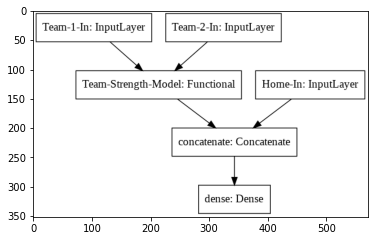

In [15]:
# Imports
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

Instructions 2/4
<p>How many inputs does this model have?</p>
<pre>
Possible Answers
1
2
<b>3</b>
4
</pre>

Instructions 3/4
<p>How many outputs does this model have?</p>
<pre>
Possible Answers
<b>1</b>
2
3
4
</pre>

Instructions 4/4
<p>Which layer is shared between 2 inputs?</p>
<pre>
Possible Answers
Team-1-In
Team-2-In
<b>Team-Strength</b>
dense_1
</pre>

## Stacking models

### Add the model predictions to the tournament data

<div class=""><p>In lesson 1 of this chapter, you used the regular season model to make predictions on the tournament dataset, and got pretty good results! Try to improve your predictions for the tournament by modeling it specifically.</p>
<p>You'll use the prediction from the regular season model as an input to the tournament model. This is a form of "model stacking."</p>
<p>To start, take the regular season model from the previous lesson, and predict on the tournament data. Add this prediction to the tournament data as a new column.</p></div>

Instructions
<p>Use the <code>model</code> to predict on the <code>games_tourney</code> dataset. The model has three inputs: <code>'team_1'</code>, <code>'team_2'</code>, and <code>'home'</code> columns. Assign the predictions to a new column, <code>'pred'</code>.</p>

In [38]:
# Predict
games_tourney['pred'] = model.predict([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']])

In [39]:
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won,pred
0,1985,288,73,0,-3,-9,41,50,0,0.063200
1,1985,5929,73,0,4,6,61,55,1,0.019946
2,1985,9884,73,0,5,-4,59,63,0,0.093686
3,1985,73,288,0,3,9,50,41,1,0.063062
4,1985,3920,410,0,1,-9,54,63,0,0.196369


**Now you can try building a model for the tournament data based on your regular season predictions.**

### Create an input layer with multiple columns

<div class=""><p>In this exercise, you will look at a different way to create models with multiple inputs. This method only works for purely numeric data, but its a much simpler approach to making multi-variate neural networks.</p>
<p>Now you have three numeric columns in the tournament dataset: <code>'seed_diff'</code>, <code>'home'</code>, and <code>'pred'</code>. In this exercise, you will create a neural network that uses a single input layer to process all three of these numeric inputs.</p>
<p>This model should have a single output to predict the tournament game score difference.</p></div>

Instructions
<ul>
<li>Create a single input layer with 3 columns.</li>
<li>Connect this input to a Dense layer with 1 unit.</li>
<li>Create a model with <code>input_tensor</code> as the input and <code>output_tensor</code> as the output.</li>
<li>Compile the model with <code>'adam'</code> as the optimizer and <code>'mean_absolute_error'</code> as the loss function.</li>
</ul>

In [40]:
# Create an input layer with 3 columns
input_tensor = Input((3,))

# Pass it to a Dense layer with 1 unit
output_tensor = Dense(1)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

### Fit the model

<div class=""><p>Now that you've enriched the tournament dataset and built a model to make use of the new data, fit that model to the tournament data.</p>
<p>Note that this <code>model</code> has only one input layer that is capable of handling all 3 inputs, so it's inputs and outputs do not need to be a list.</p>
<p>Tournament games are split into a training set and a test set. The tournament games before 2010 are in the training set, and the ones after 2010 are in the test set.</p></div>

Instructions
<ul>
<li>Fit the model to the <code>games_tourney_train</code> dataset using 1 epoch.</li>
<li>The input columns are <code>'home'</code>, <code>'seed_diff'</code>, and <code>'pred'</code>.</li>
<li>The target column is <code>'score_diff'</code>.</li>
</ul>

In [41]:
# Fit the model
model.fit(games_tourney_train[['home', 'seed_diff', 'pred']],
          games_tourney_train['score_diff'],
          epochs=1,
          verbose=True)

103/103 [==============================] - 0s 930us/step - loss: 12.0215


### Evaluate the model

<p>Now that you've fit your model to the tournament training data, evaluate it on the tournament test data.  Recall that the tournament test data contains games from after 2010.</p>

In [42]:
games_tourney_train = games_tourney[games_tourney['season'] <= 2010]
games_tourney_test = games_tourney[games_tourney['season'] > 2010]

Instructions
<ul>
<li>Evaluate the model on the <code>games_tourney_test</code> data.</li>
<li>Recall that the model's inputs are <code>'home'</code>, <code>'seed_diff'</code>, and <code>'prediction'</code> columns and the target column is <code>'score_diff'</code>.</li>
</ul>

In [43]:
# Evaluate the model on the games_tourney_test dataset
print(model.evaluate(games_tourney_test[['home', 'seed_diff', 'pred']],
               games_tourney_test['score_diff'], verbose=False))

11.239612579345703
